# Linear Regression
The most familiar and also the best place to start when pursuing an explanation of statistical and eventually machine learning models.  To conduct the development of a linear regression model, the objective will be to predict a numeric outcome given a number of inputs abouth the proble in question.  

For the example, the objective will be to predict the minutes played based on the age of the player in question to determine if there is a relationship between the two variables.

## Imports
The following libraries will be leveraged to conduct the analysis.  

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

## Opening the dataset
This example uses the data downloaded from FBref on players in La Liga. Here, just the age and minutes played columns are needed for the analysis, and only the first 20 observations are used to visualise the process. Download playerstats.csv to the working directory.

In [3]:
laliga_df=pd.read_csv("playerstats.csv",delimiter=',')

In [5]:
# create a dataframe leveraging columns from the dataset and only 20 observation
minutes_model = (pd.DataFrame()
                 .assign(minutes=laliga_df.Min[:20],
                         age=laliga_df.Age[:20],
                         age_squared = np.power(laliga_df.Age[:20],2))
                )

### Plot the data
Take a look at the data to understand what is available and the general shape of the dataset.

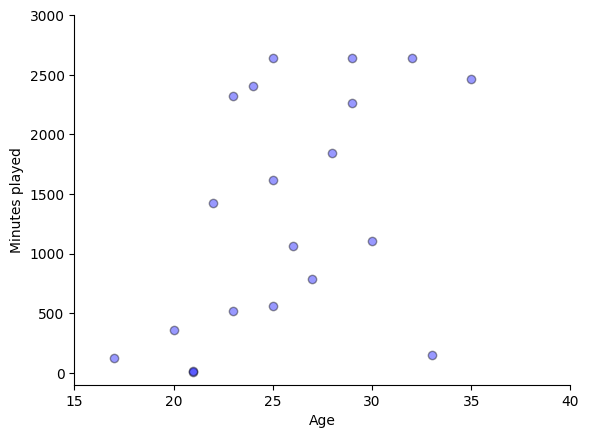

In [18]:
fig,ax=plt.subplots(num=1)
ax.scatter(minutes_model.age, minutes_model.minutes, color='blue', alpha=0.4, edgecolor='k')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines[['top','right']].set_visible(False)
plt.xlim((15,40))
plt.ylim((-100,3000))
plt.show()

### Fitting a model
For the initial evaluation, a straight linear model will be fit to the data and the R2 value will be calculated for the fit.  This is the most basic formulation for a model.

In [19]:
model_fit=smf.ols(formula='minutes  ~ age ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.415
Date:                Sat, 20 May 2023   Prob (F-statistic):             0.0318
Time:                        21:49:14   Log-Likelihood:                -163.24
No. Observations:                  20   AIC:                             330.5
Df Residuals:                      18   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1293.0147   1152.158     -1.122      0.2

In [20]:
b

Intercept   -1293.014693
age           102.540376
dtype: float64

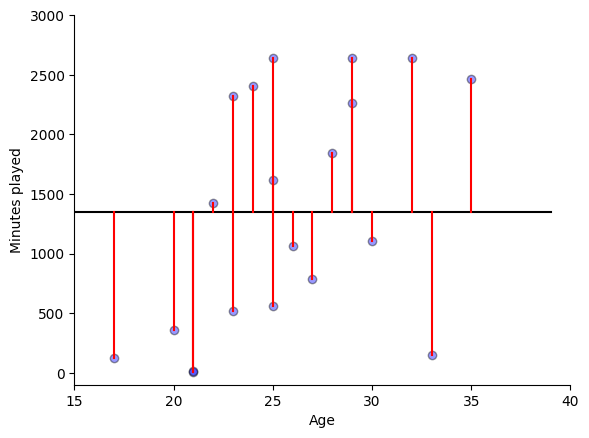

In [21]:
# plot the points
fig,ax=plt.subplots(num=1)
ax.scatter(minutes_model.age, minutes_model.minutes, color='blue', alpha=0.4, edgecolor='k')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines[['top','right']].set_visible(False)
plt.xlim((15,40))
plt.ylim((-100,3000))

# plot the mean line for the data used for the model basis
x=np.arange(40,step=1)
y= np.mean(minutes_model.minutes)*np.ones(40)
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model.age):
    ax.plot([a,a],[minutes_model.minutes[i], np.mean(minutes_model.minutes) ], color='red')
plt.show()

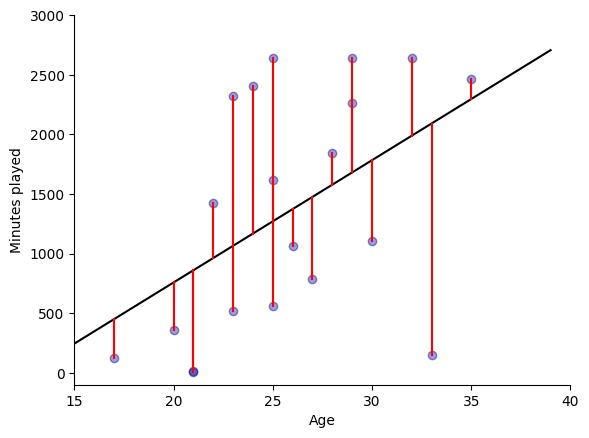

In [24]:
# plot the points
fig,ax=plt.subplots(num=1)
ax.scatter(minutes_model.age, minutes_model.minutes, color='blue', alpha=0.4, edgecolor='k')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines[['top','right']].set_visible(False)
plt.xlim((15,40))
plt.ylim((-100,3000))

# plot the mean line for the data used for the model basis
x=np.arange(40,step=1)
y= b[0] + b[1]*x
ax.plot(x, y, color='black')

for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a], color='red')
plt.show()

### Second order linear equation
Now we adjust the model to produce a second order linear equation.

In [25]:
# First fit the model second order
model_fit=smf.ols(formula='minutes  ~ age + age_squared  ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.559
Date:                Sat, 20 May 2023   Prob (F-statistic):             0.0512
Time:                        22:38:46   Log-Likelihood:                -162.38
No. Observations:                  20   AIC:                             330.8
Df Residuals:                      17   BIC:                             333.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8063.5823   5573.188     -1.447      

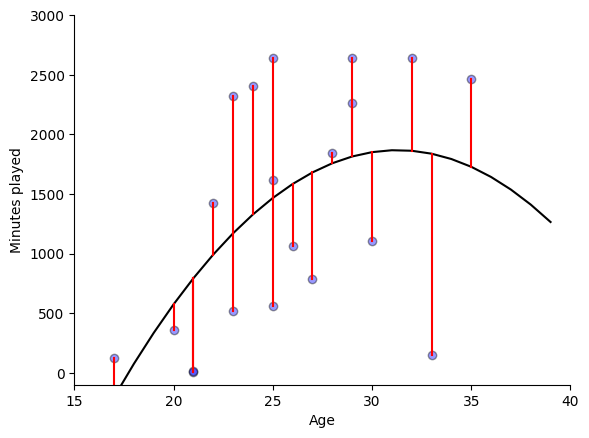

In [26]:
# plot the points
fig,ax=plt.subplots(num=1)
ax.scatter(minutes_model.age, minutes_model.minutes, color='blue', alpha=0.4, edgecolor='k')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines[['top','right']].set_visible(False)
plt.xlim((15,40))
plt.ylim((-100,3000))

# plot the mean line for the data used for the model basis
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x
ax.plot(x, y, color='black')

for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a + b[2]*a*a], color='red')
plt.show()